In [107]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

Qustion 2

a)
we will solve problem (1) using $l_2$ norm, the solution is:

$ \hat{x} = $

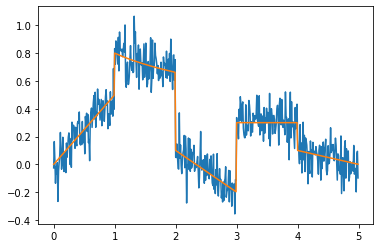

In [108]:
x = np.arange(0,5, 0.01)
n = np.size(x)
one = int(n / 5)
f = np.zeros(x.shape)
f[0:one] = 0.0 + 0.5*x[0:one]
f[(one):2*one] = 0.8 - 0.2*np.log(x[100:200]);
f[(2*one):3*one] = 0.7 - 0.3*x[(2*one):3*one];
f[(3*one):4*one] = 0.3
f[(4*one):(5*one)] = 0.5 - 0.1*x[(4*one):(5*one)];
G = spdiags([-np.ones(n), np.ones(n)], np.array([0, 1]), n-1,n)
etta = 0.1*np.random.randn(np.size(x));
y = f + etta
plt.figure(); plt.plot(x,y); plt.plot(x,f); plt.show()

section (a) - solution using LS with l2 norm

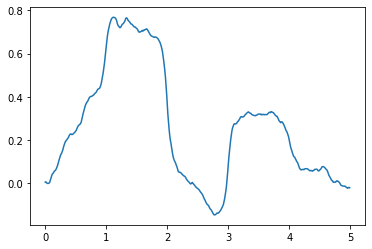

In [109]:
#todo: check it and add text explenation
G = A = np.array(G.toarray())
x_ls =la.inv(np.identity(n) + (80/2)*G.transpose()@G) @ y
plt.figure(); plt.plot(x,x_ls); plt.show()

section (b) - solving (1) using IRLS



In [110]:
epsilon = 0.001
def get_w(i,x_k):
    return 1/(np.abs(np.inner(G[i],x_k[i])) + epsilon)

In [111]:
def IRLS(num_iter = 10 , get_w = get_w):
    # start with w = I
    # in every iter:
    # 1) Calculate G.TRANSPOSE() @ W @ G
    # 2) calculate W matrix
    W = np.identity(len(G))
    for i in range(num_iter):
        # print(f'{len(G.transpose()[0])=} {len(W)} {len(G)=} {n=} {len(y)=}')
        the_inv =la.inv(np.identity(n) + ((G.transpose() @ W) @ G))
        x_curr = the_inv @ y
        W = np.diag(np.diag([get_w(i,x_curr) for i in range(len(W))]))
    return x_curr

sol = IRLS(3)

[[ 47.33599756   0.           0.         ...   0.           0.
    0.        ]
 [  0.          15.01249161   0.         ...   0.           0.
    0.        ]
 [  0.           0.          72.6121279  ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  11.98022769   0.
    0.        ]
 [  0.           0.           0.         ...   0.         293.00629282
    0.        ]
 [  0.           0.           0.         ...   0.           0.
   49.89926715]]
[[560.53913755   0.           0.         ...   0.           0.
    0.        ]
 [  0.         790.63036844   0.         ...   0.           0.
    0.        ]
 [  0.           0.          94.64857533 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  35.97431273   0.
    0.        ]
 [  0.           0.           0.         ...   0.          55.99197868
    0.        ]
 [  0.           0.           0.         ...   0.           0.
   56.33138284]]
[[379.01854137   0.     

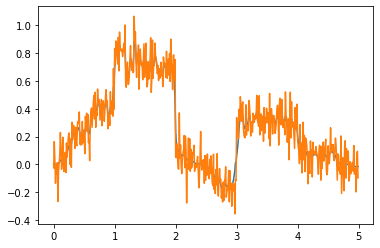

In [112]:
plt.figure(); plt.plot(x,sol);plt.plot(x,y); plt.show()
# 500_499 @ 499_499 @ 499_500

